In [317]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import graphviz 
%matplotlib inline

In [318]:
credit_df = pd.read_csv('/Users/saptarshighose/Downloads/Machine-Learning/HW2/credit-data.csv')

# Data Pre-Processing

In [319]:
credit_df['NumberOfDependents'].describe()

count    39979.000000
mean         0.773231
std          1.121269
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: NumberOfDependents, dtype: float64

In [320]:
credit_df['MonthlyIncome'].describe()

count    3.304200e+04
mean     6.578996e+03
std      1.344683e+04
min      0.000000e+00
25%      3.333000e+03
50%      5.250000e+03
75%      8.055750e+03
max      1.794060e+06
Name: MonthlyIncome, dtype: float64

In [321]:
#Chose to fill missing data with mean here because results are not being skewed strongly by outliers as seen above. 
#Mean and median are also close -- but median for number of dependents is 0 -- so may be less meaningful in understanding
#more granular context here.

mean_dependents = credit_df.NumberOfDependents.mean()
credit_df['NumberOfDependents'].fillna(mean_dependents, inplace=True)

mean_income = credit_df.MonthlyIncome.mean()
credit_df['MonthlyIncome'].fillna(mean_income, inplace=True)

In [322]:
credit_df.head(5)
credit_df.shape

(41016, 13)

# Data Exploration

## Correlation Heatmap

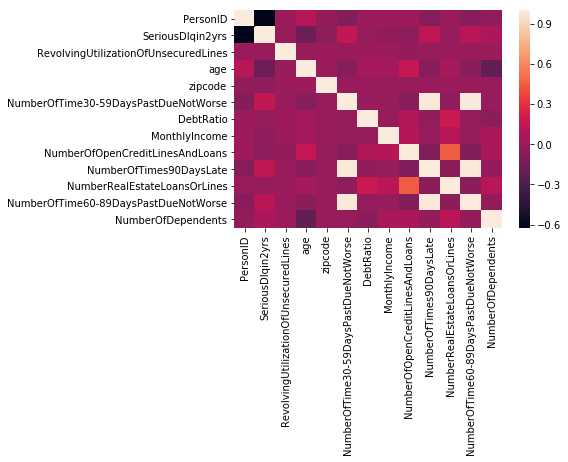

In [323]:
import seaborn as sns
corr = credit_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Age by mean number of dependents

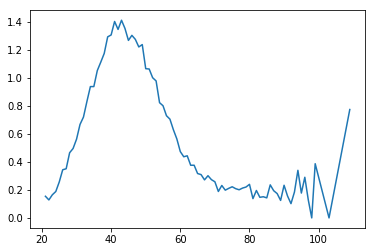

In [324]:
mean_age = credit_df.groupby('age').mean()
x = list(mean_age.index.values)
y = list(mean_age.NumberOfDependents.values)
plt.plot(x, y)
plt.show()

## Age by mean number of delinquencies 

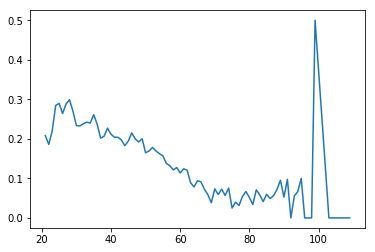

In [325]:
x = list(mean_age.index.values)
y = list(mean_age.SeriousDlqin2yrs.values)
plt.plot(x, y)
plt.show()

## Age by mean number of number of open credit lines and loans 

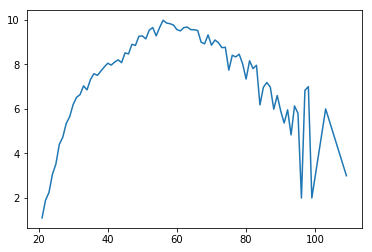

In [326]:
x = list(mean_age.index.values)
y = list(mean_age.NumberOfOpenCreditLinesAndLoans.values)
plt.plot(x, y)
plt.show()

# Generate features and predictors

## Take a categorical variable (age) and create binary/dummy variable (senior citizen or not) from it

In [327]:
def add_dummy_variable(df, var, dummy_var, lambda_equation):
    df[dummy_var] = df[var].apply(lambda_equation)

add_dummy_variable(credit_df, 'age', 'Senior_Citizen', lambda x: 65 < x )    

In [328]:
credit_df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Senior_Citizen
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0,False
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0,True
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0,False
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0,False
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0,False


## Discretize a continuous variable

In [329]:
credit_df['Discrete_Monthly_Income'] = pd.cut(credit_df['MonthlyIncome'], 500)

# Build Classifier - KNN

In [330]:
adjust_df = credit_df.drop(['Senior_Citizen', 'Discrete_Monthly_Income'], axis =1)

In [331]:
adjust_df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [332]:
def data_split(df, var, test_size):
    X = df
    Y = df[var]
    test_size = 0.3
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = data_split(adjust_df, 'SeriousDlqin2yrs', .3)

In [333]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', metric_params={'d': 3})
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
knn.predict_proba(x_test)

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [334]:
knn.score(x_train,y_train)

1.0

In [335]:
knn.score(x_test,y_test)

0.89719626168224298

# Write-up

The first step of building the machine learning pipeline for this assignment was to download and read in the provided data into Jupyter notebook as a pandas dataframe.  I then explored the data – including generating distributions of the data, building a correlation heat map of the relevant variables, finding outliers, and summarizing the data.  In this process, I noticed that two fields had missing values – specifically the fields NumberOfDependents and MonthlyIncome.  I chose to fill in missing data with the mean value of from all other records in the field because the data exploration showed that the results are not being skewed strongly by outliers. The mean and median are also close -- but median for NumberOfDependents is 0 -- so may be less meaningful in understanding more granular context.  

In the data exploration phase, I also noticed some interesting points.  Specifically, when I built a chart of age by mean number of dependents, I saw that for age 60, people's number of delinquincies is relatively low -- ~.15 delinquincies on average.  When I built a chart of age by mean number of open credit lines and loans and looked at the results for age 60, there was an average of ~10 open credit lines.  I found this to be an interesting juxtaposition in the data exploration phase.  

Then, I proceeded to generate features and predictors – including discretizing the continuous variable 'MonthlyIncome'.  I also created a dummy variable here for whether a person is a Senior Citizen -- which is binary for if the person is age 65 or above (then TRUE) else FALSE.  After this step, I built the classifier using KNN and the minkowski distance metric.  I played around with the parameters of the model and chose a test size of .3 and 10 nearest neighbors.  Finally, I evaluated the classification model and found that the accuracy score on the test data was .897 while it was 1.0 for the training data.  Normally I would be concerned about overfitting with the 1.0 score for the training score, but Rayid said that this is acceptable for this homework.  
